# 1. ¿Qué es una red neuronal?

Es una estructura similar a la neurona biológica por lo menos a nivel conceptual.
En una neurona biológica recibimos una señal eléctrica para saber que hacer, "combinaciones de estas crean el pensamiento". # Tenemos entradas que serían nuestros sentidos (tacto, olfato...) y en el caso de las máquinas serían los datos. 

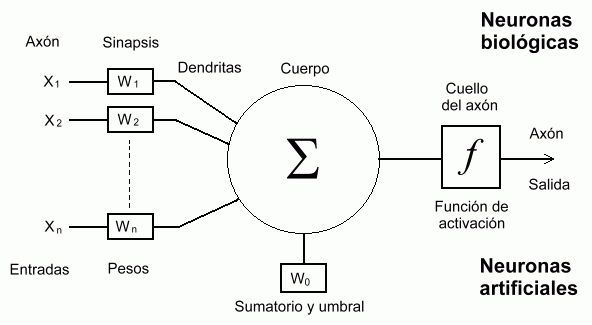

In [1]:
from IPython.display import Image
Image(filename='./images/2.gif', width=500) 

Las redes neuronales permiten buscar la combinación de parámetros que mejor se ajusta a un determinado problema.
Su unidad básica es el perceptrón --> Elemento que tiene varias entradas con cierto peso cada una y si la suma de estas entradas es mayor que un determinado número la salida es 1, en caso contrario es 0.

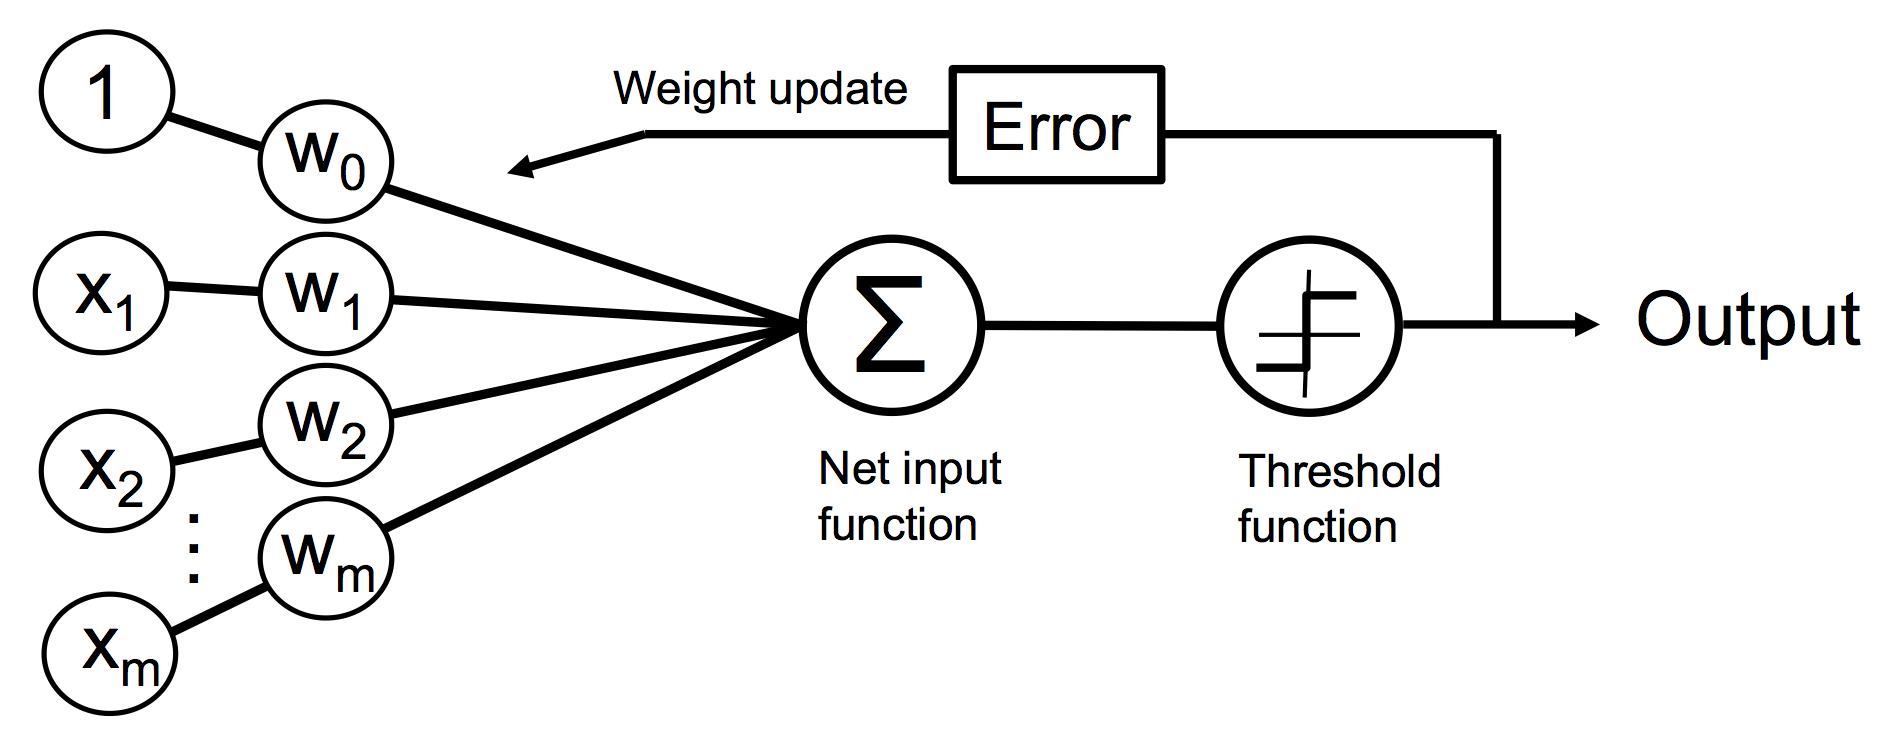

In [2]:
Image(filename='./images/4.png', width=500) 

## 1.1. Función de activación

Tenemos distintas funciones de activación pero las más comunes son las siguientes:
1. paso: tenemos 0 ó 1
2. signos: tenemos -1 o 1
3. sigmoide: tenemos todos los posibles valores entre 0 y 1
4. ...

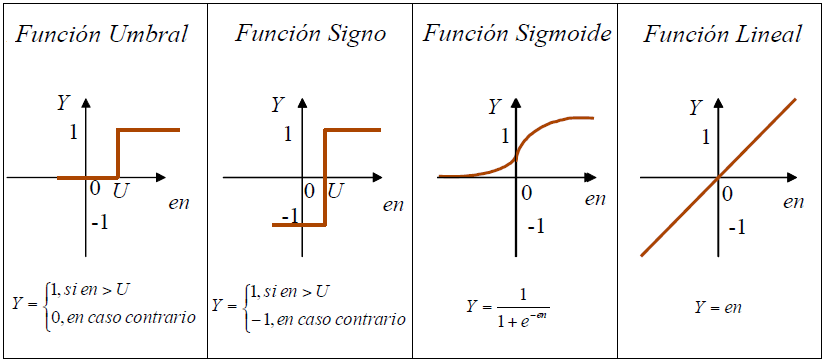

In [3]:
Image(filename='./images/3.png', width=500) 

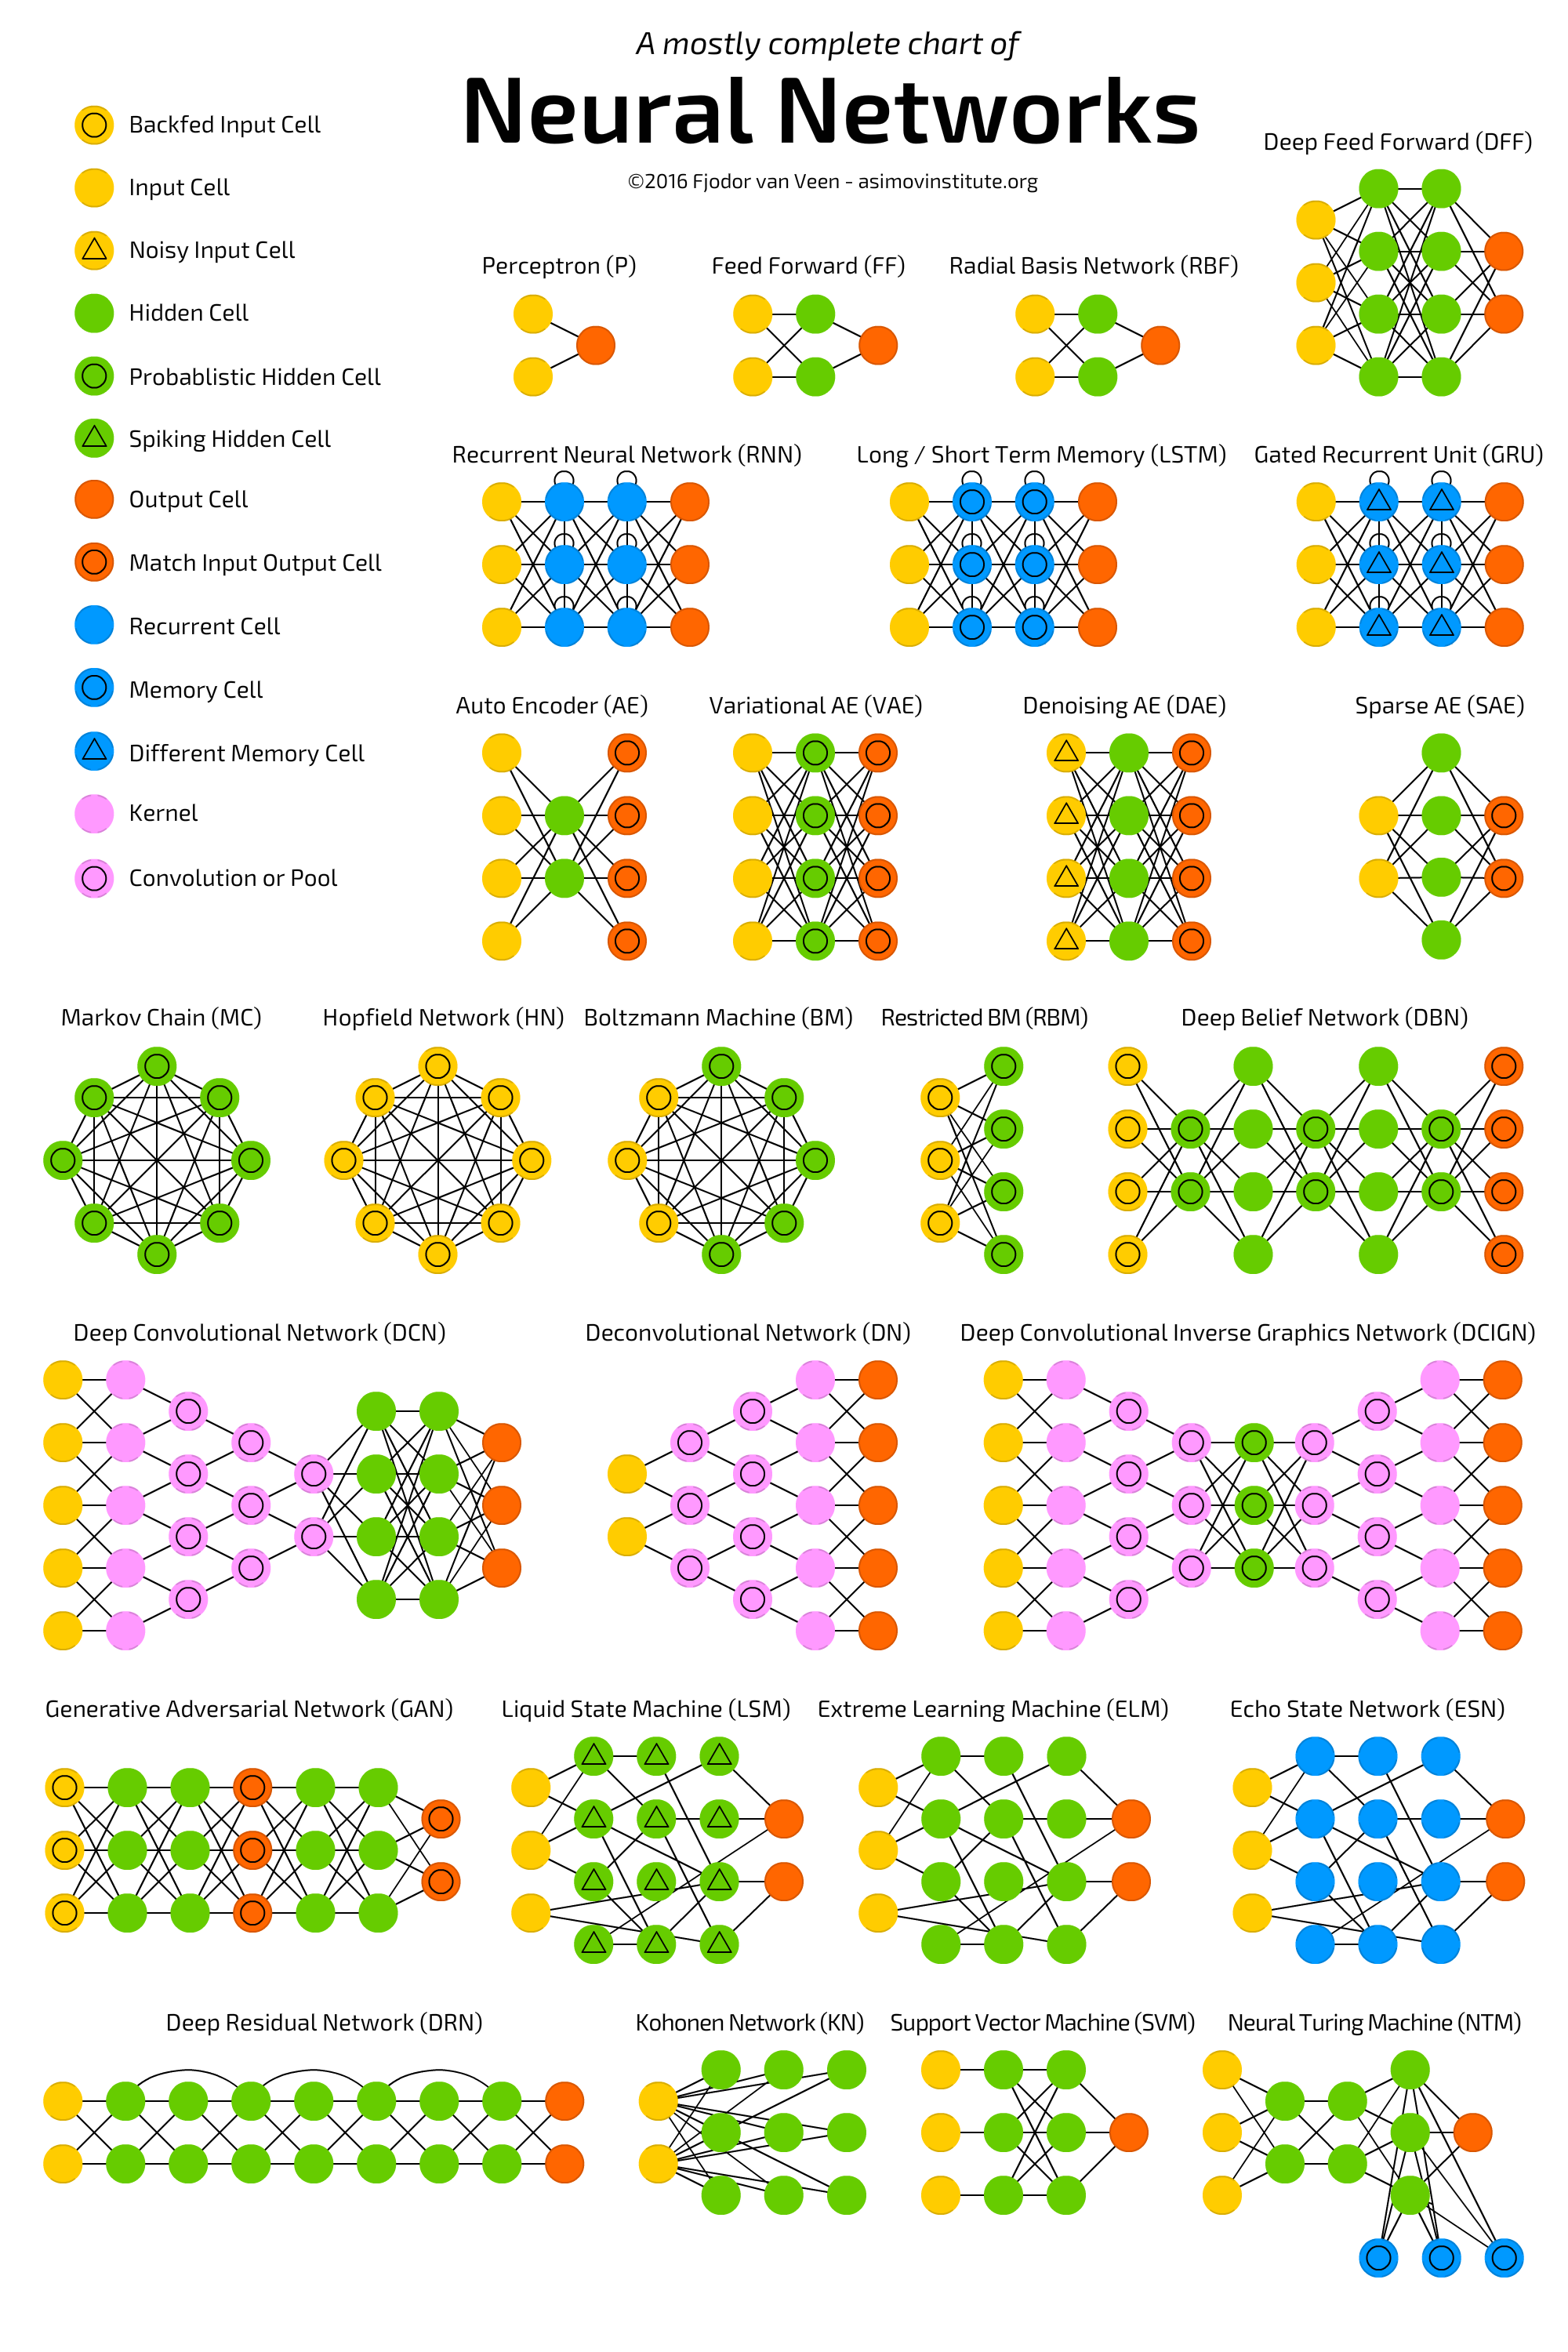

In [4]:
# Nota: La unidad básica es el perceptrón pero tenemos diferentes estructuras
Image(filename='./images/1.png', width=500) 



# 2. ¿Cómo se implementa en Python una red neuronal? 

## 2.1. Ejemplo básico de una red neuronal (Feed Forward)

Vamos a intentar predecir el resultado de la siguiente tabla:

In [5]:
print("entrada   |  salida\n"
        "0  0  1   |    0\n"
        "0  1  1   |    0\n"
        "1  0  1   |    1\n"
        "1  1  1   |    1")

entrada   |  salida
0  0  1   |    0
0  1  1   |    0
1  0  1   |    1
1  1  1   |    1


### Especificamos la entrada y salida del modelo

In [6]:
import numpy as np
   
# Datos de entrada
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# Datos de salida           
y = np.array([[0,0,1,1]]).T

# Especificamos que los números aleatorios generados sean exactamente los mismos
np.random.seed(1) 

### Utilizaremos la función sigmoide para activación e inicializamos los pesos:

In [7]:
# Función sigmoide
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# Inicializamos los pesos al azar
# (existe teoría referente al valor inicial de los pesos)
# vamos a dejar valor de media 0
# Temenos una matriz de peso para conectar las capas (son 2: entrada y salida)
# (3,1) --> tres datos para cada entrada, una salida
syn0 = 2*np.random.random((3,1)) - 1

### Finalmente predecimos nuestra salida:

In [8]:
for iter in range(10000):

    # "Feed forward (FF)"
    # l0 -> primera capa
    # l1 -> capa oculta
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # Cuanto es el error (datos reales-datos predecidos)
    l1_error = y - l1

    # Hallamos el error derivado ponderado
    # Multiplicando el error por las pendientes
    # Esto, para reducir el error de las prediciones
    l1_delta = l1_error * nonlin(l1,True)

    # Actualizamos los pesos
    syn0 += np.dot(l0.T,l1_delta)
    
print("Datos predecidos")
print(l1)
print("Parece bien :) NOTA -> Comparar con y\n")

Datos predecidos
[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]
Parece bien :) NOTA -> Comparar con y



Para resolver modelo con más capas, revisar: https://iamtrask.github.io/2015/07/12/basic-python-network/



## 2.2. Ejemplo con dataset iris y el clasificador Random Forest

### Cargamos liberias:

In [9]:
from sklearn.datasets import load_iris # Dataset de iris
from sklearn.ensemble import RandomForestClassifier # Clasificador random forest
import pandas as pd
import numpy as np

# Los números aleatorios generados sean exactamente los mismos
np.random.seed(0)

### Cargamos datos de iris:

In [10]:
# Objeto llamado iris con los datos de iris
iris = load_iris()

# Creamos dataframe con las cuatro variables que miden varias ...
# partes de flores de iris relacionado con tres especies 
# Un dataframe es una estructura de datos similar a una matriz
# pero a diferencia de esta, admite también datos alfanúmericos
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Nueva columna con los nombres de las especies, (esto es lo que vamos a tratar de predecir)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Veamos las 5 primeras filas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Datos de entrenamiento y prueba:

In [11]:
# Nueva columna para cada fila, generá un número aleatorio entre 0 y 1, y si ese valor es menor o igual a .75,
# establece el valor de esa celda como True de lo contrario es false. 
#(forma rápida y sucia de asignar aleatoriamente la funcion de activación)
# se utilizará como datos de entrenamiento y algunos otros datos como datos de prueba.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# Creamos dos nuevos datos, uno con las filas de entrenamiento, uno con las filas de prueba
train, test = df[df['is_train']==True], df[df['is_train']==False]

# Muestramos longitud de datos de entramiento(train) y prueba(test)
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

# Veamos las 5 primeras filas
df.head()

Number of observations in the training data: 118
Number of observations in the test data: 32


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


### Preprocesamos los datos: 

In [12]:
# Creamos una lista de los nombres de las columnas de características
features = df.columns[:4]

# Veamos caracteristicas de las plantas o flores (ancho y largo del sépalo y pétalo) --> 2^2 = 4 
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [13]:
# train['especies'] contiene los nombres reales de las especies. (setosa, virginia, versicolor)
# necesitamos convertir el nombre de cada especie en un dígito(es lo que entiende la red). 
# Entonces, en este caso son tres especies, que se han codificado como 0, 1 o 2.
y = pd.factorize(train['species'])[0]

# Veamos las etiquetas (también se conocen como las clases)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

### Entrenar al clasificador random Forest:

In [14]:
# Creamos un clasificador random forest. Por convención, clf significa 'clasificador'
clf = RandomForestClassifier(max_depth=100, random_state=0, n_estimators=100)

# Entrenamos al clasificador con las características[entradas ó X] de la planta 
# para que aprenda cómo se relacionan con la especie[salidas ó y]
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Aplicamos clasificador a los datos de prueba:

In [15]:
# Aplicamos el clasificador que hemos entrenado a los datos de la prueba 
clf.predict(test[features])

# Veamos las probabilidades predichas de las primeras 10 observaciones
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

Hay tres especies de plantas, por lo tanto, [ 1. , 0. , 0. ] nos dice que el clasificador está seguro de que la planta es la primera clase. Tomando otro ejemplo, [ 0.9, 0.1, 0. ] nos dice que el clasificador da un 90% de probabilidad de que la planta pertenezca a la primera clase y un 10% de probabilidad de que la planta pertenezca a la segunda clase. 

### Evaluamos clasificador:

In [16]:
# Asignamos los nombres reales para las plantas de cada clase de planta prevista
# quiere decir, 1 -> equivale a setosa...
preds = iris.target_names[clf.predict(test[features])]

# Veamos las especies "predecidas" para las primeras cinco observaciones
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [17]:
# Vemos también las especies "reales" para las primeras cinco observaciones
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]



## 2.3. Importancia de los datos

In [18]:
# Ver una lista de las características y sus puntajes de importancia
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.08474010289429795),
 ('sepal width (cm)', 0.022461263894393204),
 ('petal length (cm)', 0.4464851467243143),
 ('petal width (cm)', 0.4463134864869946)]

Esta es la parte más genial :) del calsificador, al obtener una puntuación, nos dice cuán importante era cada característica en la clasificación.
"Podemos ver claramente que el ancho de los pétalos era más importante en la clasificación que el ancho del sépalo".


## 2.4. Otra forma de entender las predicciones



## Matriz de confusión 

Entonces, si tomamos la fila superior, podemos ver que predijimos perfectamente las 13 plantas setosa. Pero en la siguiente fila, predijimos 5 de las plantas versicolor correctamente, pero predijimos mal 2 de las plantas versicolor como virginica.

In [19]:
# Creamos matriz de confusión
# Las columnas son las especies que "predecidas" para los datos de prueba 
# Las filas son las especies "reales" para los datos de prueba
print(pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species']))

Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa                 13           0          0
versicolor              0           5          2
virginica               0           0         12


Brevemente --> cualquier cosa en la diagonal se clasificó correctamente y cualquier cosa fuera de la diagonal se clasificó incorrectamente.




## F1_score

El puntaje F1 se puede interpretar como un promedio ponderado de la precisión y el recuerdo, donde un puntaje F1 alcanza su mejor valor en 1 y el peor puntaje en 0 (un puntaje F1 alto es un signo de un modelo con buen desempeño)

Se calcula de la siguiente manera: --> 2 * (precision * recall) / (precision + recall)

Revisar: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [20]:
from sklearn.metrics import f1_score # Importamos f1_score

# Predecir la etiquetas del conjunto de datos
prediction = clf.predict(train[features])

# Calculamos el f1_score
f1_RF = f1_score(y, prediction, average=None)

# Imprimimos porcentaje de predicción para las tres clases o etiquetas
print('Predicción: ', f1_RF)

Predicción:  [1. 1. 1.]


Notamos que a partir del f1_score podemos decir que el modelo está:
100% de que la primera clase es setosa.
98.8% de que la segunda clase es versicolor
98.7% de que la tercera clase es virginica

Calculemos el porcentaje de predicción de nuestro modelo:

In [21]:
suma = 0
for i in f1_RF:
     suma = suma + i
     percent = suma*100/len(f1_RF)
     
print("Porcentaje de predicción: ", percent, "%")

Porcentaje de predicción:  100.0 %



# 3. ¿Porqué se entrena una red neuronal?

Porque hay algunas tareas específicas que "necesitan aprender", tareas como: autos sin conductor, recomendación de contenido, procesamiento de imagenes y/o video, filtros de correos no deseados (spam), entre otras muchas tareas.
Y la IA en general sacan el mayor provecho de los datos, porque las "respuestas están en los datos".
(El trabajo Inicial con redes neuronales despierta emoción por esa idea de máquinas pensantes).